In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
ruta = "ObesityDataSet.csv"
global df, resultados
df = pd.read_csv(ruta)
print(df.shape, "\n ", df.columns)

(2111, 17) 
  Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [74]:
# account_ permite contar los valores dentro de cada columna
# al hacer el .index trae el indice con cada una de las categorías
# para el ciclo laso (loop)
df.FAVC.value_counts().index

Index(['yes', 'no'], dtype='object', name='FAVC')

In [75]:
# selecciona las columnas que son de tipo objetos
# imprime el nombre de cada columna y en la parte inferior las categorías de cada columna
columnas = list(df.select_dtypes(include=["object"]).columns)
for columna in columnas:
    print(f"El nombre de la columna: {columna}")
    print(list(df[f"{columna}"].value_counts().index))

El nombre de la columna: Gender
['Male', 'Female']
El nombre de la columna: family_history_with_overweight
['yes', 'no']
El nombre de la columna: FAVC
['yes', 'no']
El nombre de la columna: CAEC
['Sometimes', 'Frequently', 'Always', 'no']
El nombre de la columna: SMOKE
['no', 'yes']
El nombre de la columna: SCC
['no', 'yes']
El nombre de la columna: CALC
['Sometimes', 'no', 'Frequently', 'Always']
El nombre de la columna: MTRANS
['Public_Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike']
El nombre de la columna: NObeyesdad
['Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight']


In [76]:
df.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight


In [77]:
def procesar_datos():
    global df
    df = df.drop_duplicates() if df.duplicated().any() else df
    df = df.dropna() if df.isnull().values.any() else df

    a = { 'Male':1
         , 'Female':2
    }
    df["Gender"] = df["Gender"].map(a)
    a = { 'yes':1
         , 'no':2
    }
    df["family_history_with_overweight"] = df["family_history_with_overweight"].map(a)
    df["FAVC"] = df["FAVC"].map(a)
    df["SMOKE"] = df["SMOKE"].map(a)
    df["SCC"] = df["SCC"].map(a)
    a = { 'Sometimes' : 1,
        'Frequently' : 2,
        'Always' : 3,
        'no' : 4
    }
    df["CAEC"] = df["CAEC"].map(a)
    df["CALC"] = df["CALC"].map(a)
    a = { 'Public_Transportation' : 1, 
         'Automobile' : 2, 
          'Walking' : 3, 
         'Motorbike' : 4, 
         'Bike' : 5
   }
    df["MTRANS"] = df["MTRANS"].map(a)
    a = { 'Obesity_Type_I' : 1,
          'Obesity_Type_III' : 2,
          'Obesity_Type_II' : 3, 
          'Overweight_Level_I'  :4,
          'Overweight_Level_II' : 5,
          'Normal_Weight'  : 6,
          'Insufficient_Weight' : 7
    }
    df['NObeyesdad'] = df['NObeyesdad'].map(a)


In [78]:
procesar_datos()
df.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21.0,1.62,64.0,1,2,2.0,3.0,1,2,2.0,2,0.0,1.0,4,1,6
1,2,21.0,1.52,56.0,1,2,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,6
2,1,23.0,1.80,77.0,1,2,2.0,3.0,1,2,2.0,2,2.0,1.0,2,1,6


In [79]:
# luego de limpiar los datos se deben de mirar la calidad de los datos
# por lo cual se sigue con la exploración de los datos
# aca se va a discretisar los datos
# para no dañar la linea el espacio se da despues de la coma
variables_discretas = ['Age','Height','Weight']
df[variables_discretas].tail(3)

,Age,Height,Weight
2108,22.524036,1.752206,133.689352
2109,24.361936,1.739450,133.346641
2110,23.664709,1.738836,133.472641


In [80]:
def feature_engineering():
  global df
  df['rango_Age'] = pd.cut(x = df['Age'],
                                  bins = np.linspace(df['Age'].min(),df['Age'].max(), num=7).astype(int),
                                  labels = [1, 2, 3, 4, 5, 6])
  df['rango_Height'] = pd.cut(x = df['Height'],
                                  bins = np.linspace(df['Height'].min(),df['Height'].max(), num=7),
                                  labels = [1, 2, 3, 4, 5, 6])
  df['rango_Weight'] = pd.cut(x = df['Weight'],
                                  bins = np.linspace(df['Weight'].min(),df['Weight'].max(), num=7).astype(int),
                                  labels = [1, 2, 3, 4, 5, 6])
  df = df.drop(columns=['Age','Height','Weight'])


In [81]:
print(np.linspace(df['Age'].min(),df['Age'].max(), num=7))
print(np.linspace(df['Age'].min(),df['Age'].max(), num=7).astype(int))
print(np.linspace(df['Height'].min(),df['Height'].max(), num=7))
print(np.linspace(df['Height'].min(),df['Height'].max(), num=7).astype(int))
print(np.linspace(df['Weight'].min(),df['Weight'].max(), num=7))
print(np.linspace(df['Weight'].min(),df['Weight'].max(), num=7).astype(int))


[14.         21.83333333 29.66666667 37.5        45.33333333 53.16666667
 61.        ]
[14 21 29 37 45 53 61]
[1.45       1.53833333 1.62666667 1.715      1.80333333 1.89166667
 1.98      ]
[1 1 1 1 1 1 1]
[ 39.          61.33333333  83.66666667 106.         128.33333333
 150.66666667 173.        ]
[ 39  61  83 106 128 150 173]


In [82]:
feature_engineering()
df.head(20)

,Gender,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,rango_Age,rango_Height,rango_Weight
0,2,1,2,2.0,3.0,1,2,2.0,2,0.0,1.0,4,1,6,1,2,2
1,2,1,2,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,6,1,1,1
2,1,1,2,2.0,3.0,1,2,2.0,2,2.0,1.0,2,1,6,2,4,2
3,1,2,2,3.0,3.0,1,2,2.0,2,2.0,0.0,2,3,4,2,4,3
4,1,2,2,2.0,1.0,1,2,2.0,2,0.0,0.0,1,1,5,2,4,3
5,1,2,1,2.0,3.0,1,2,2.0,2,0.0,0.0,1,2,6,2,2,1
6,2,1,1,3.0,3.0,1,2,2.0,2,1.0,0.0,1,4,6,2,1,1
7,1,2,2,2.0,3.0,1,2,2.0,2,3.0,0.0,1,1,6,2,3,1
8,1,1,1,3.0,3.0,1,2,2.0,2,1.0,1.0,2,1,6,2,4,2
9,1,1,1,2.0,3.0,1,2,2.0,2,1.0,1.0,4,1,6,2,4,2


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


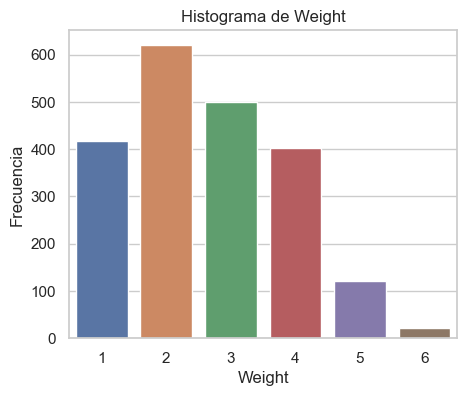

In [83]:
# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crear el histograma utilizando Seaborn
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='rango_Weight')
plt.title('Histograma de Weight')
plt.xlabel('Weight')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()
'''
recordar que 
'Obesity_Type_I' : 1,
          'Obesity_Type_III' : 2,
          'Obesity_Type_II' : 3, 
          'Overweight_Level_I'  :4,
          'Overweight_Level_II' : 5,
          'Normal_Weight'  : 6,
          'Insufficient_Weight' : 7'''

In [87]:
def analisis_exploratorio():
  global df
  histogramas = ['rango_Weight','NObeyesdad','MTRANS','rango_Height','rango_Age']
  lista_histogramas = list(enumerate(histogramas))
  plt.figure(figsize = (30,20))
  plt.title('Histogramas')
  for i in lista_histogramas:
    plt.subplot(3, 2, i[0]+1)
    sns.countplot(x = i[1], data = df)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_11852\573233073.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i[0]+1)
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

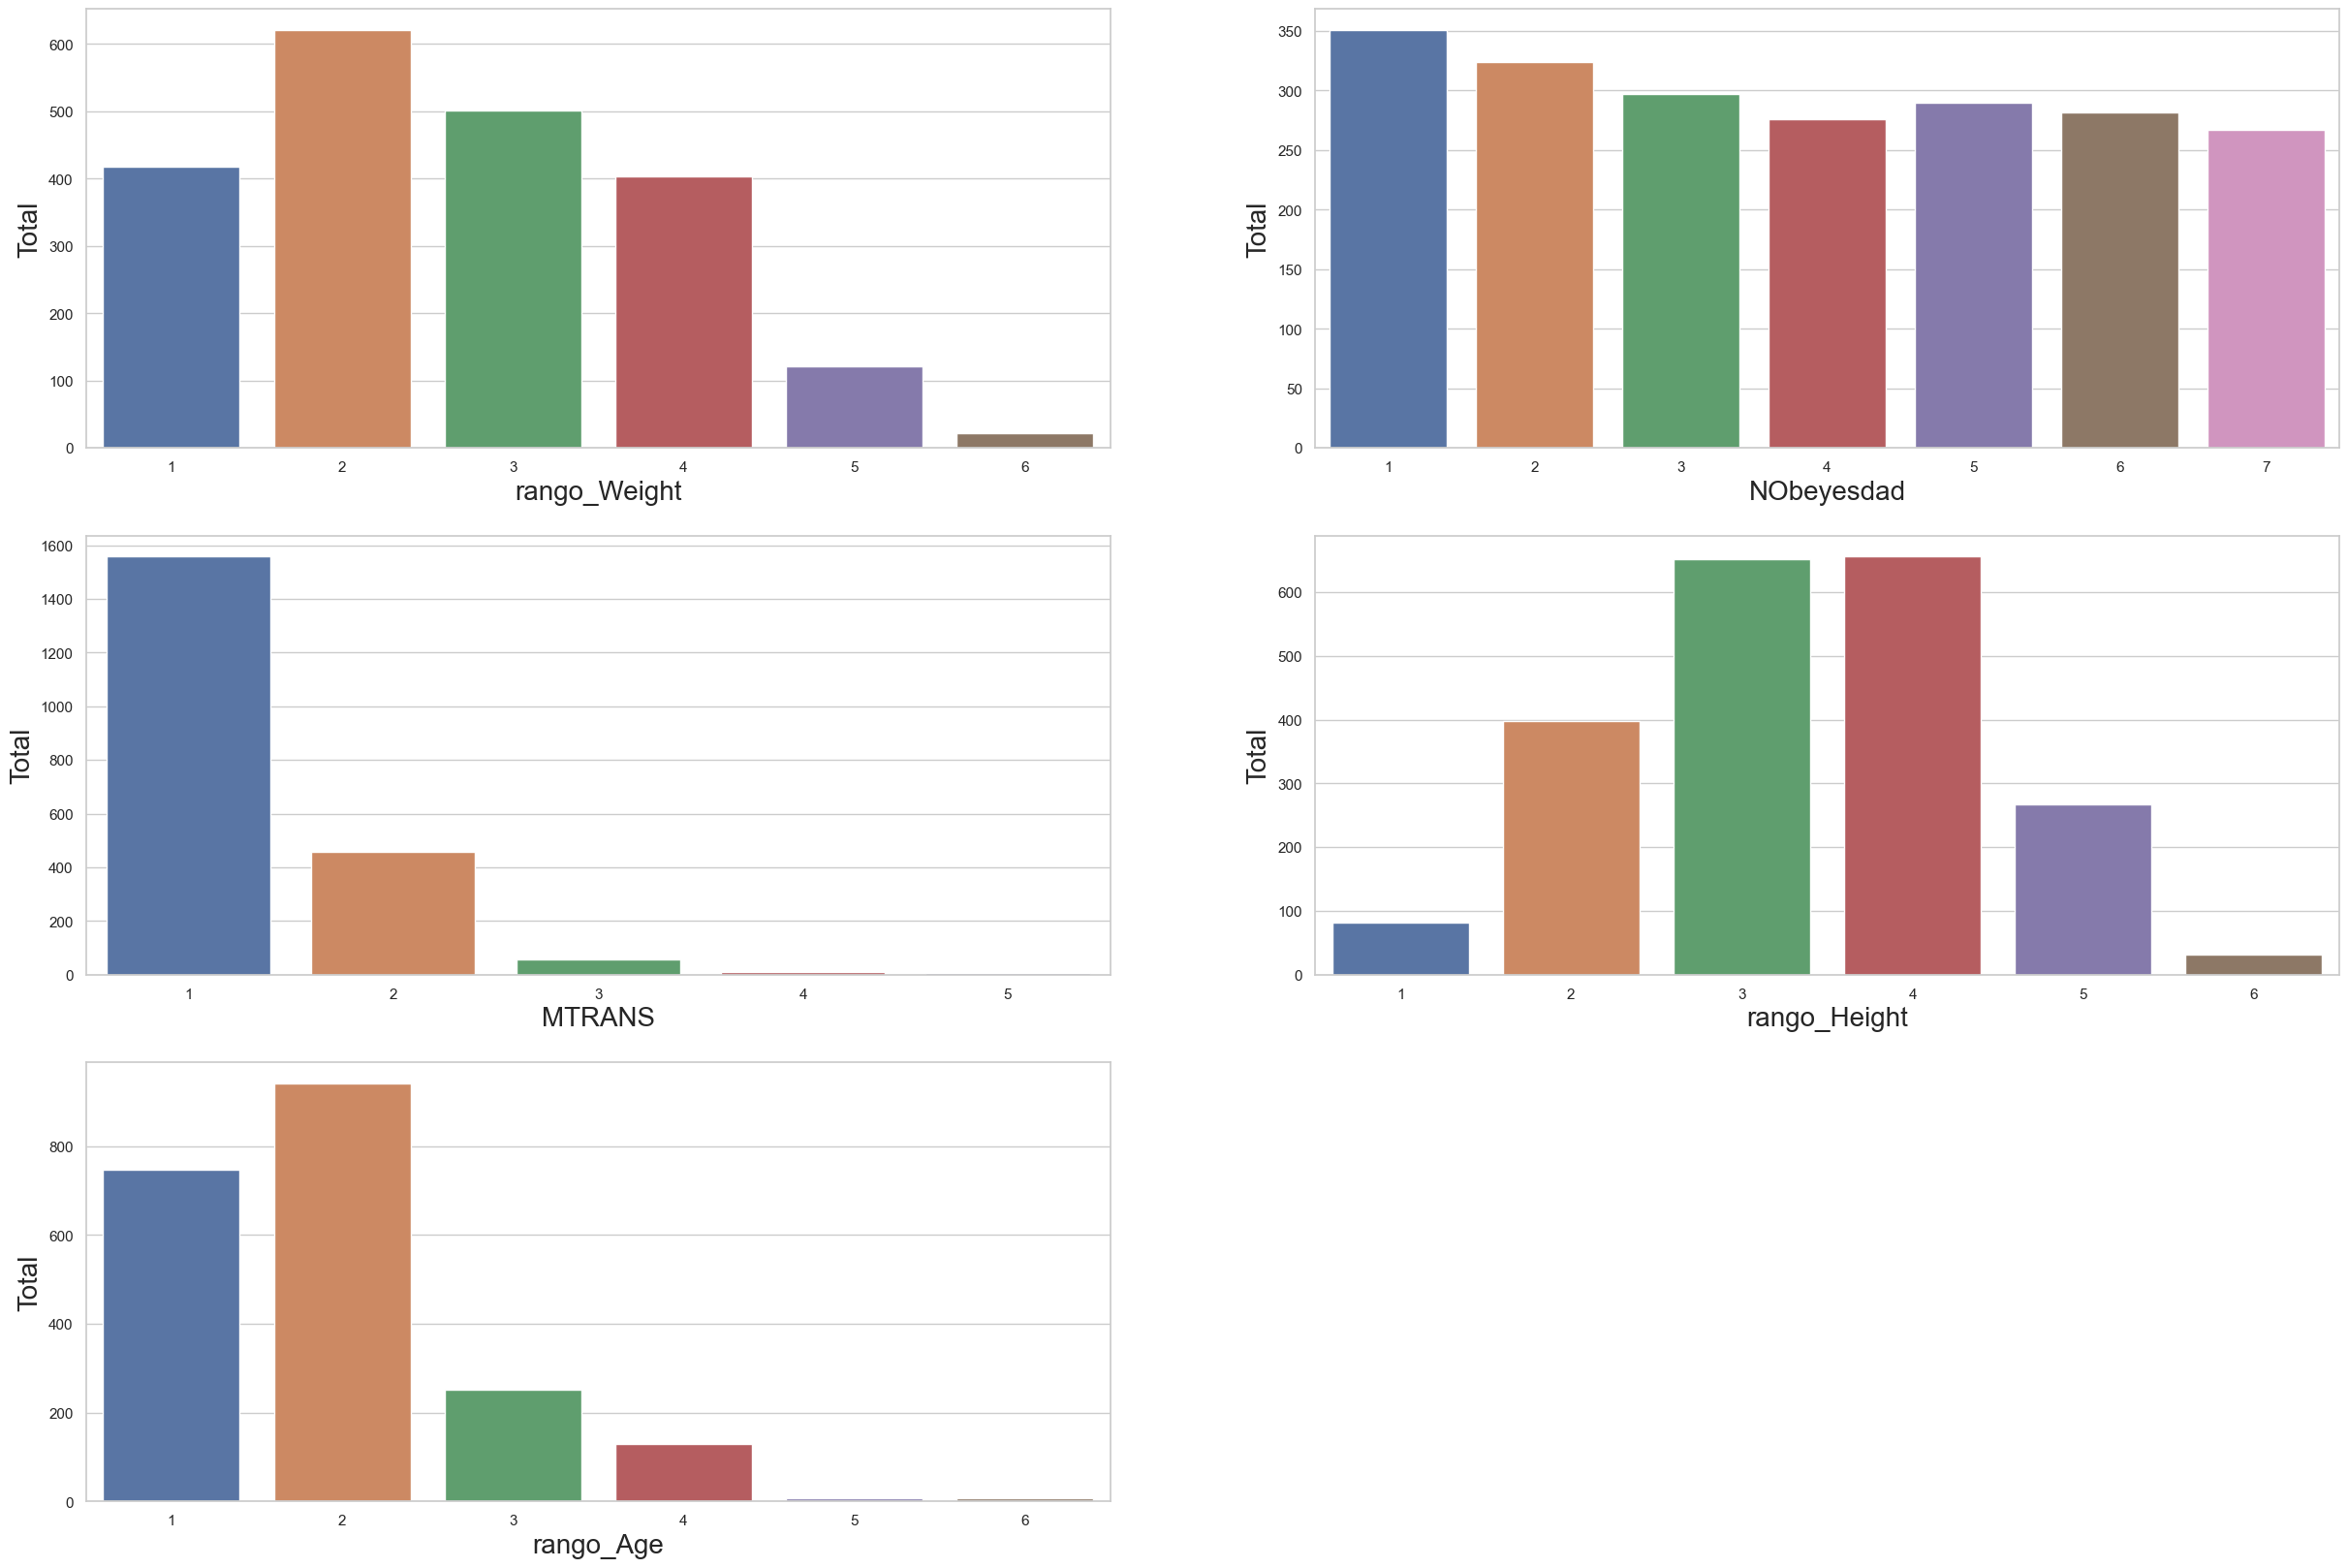

In [88]:
analisis_exploratorio()

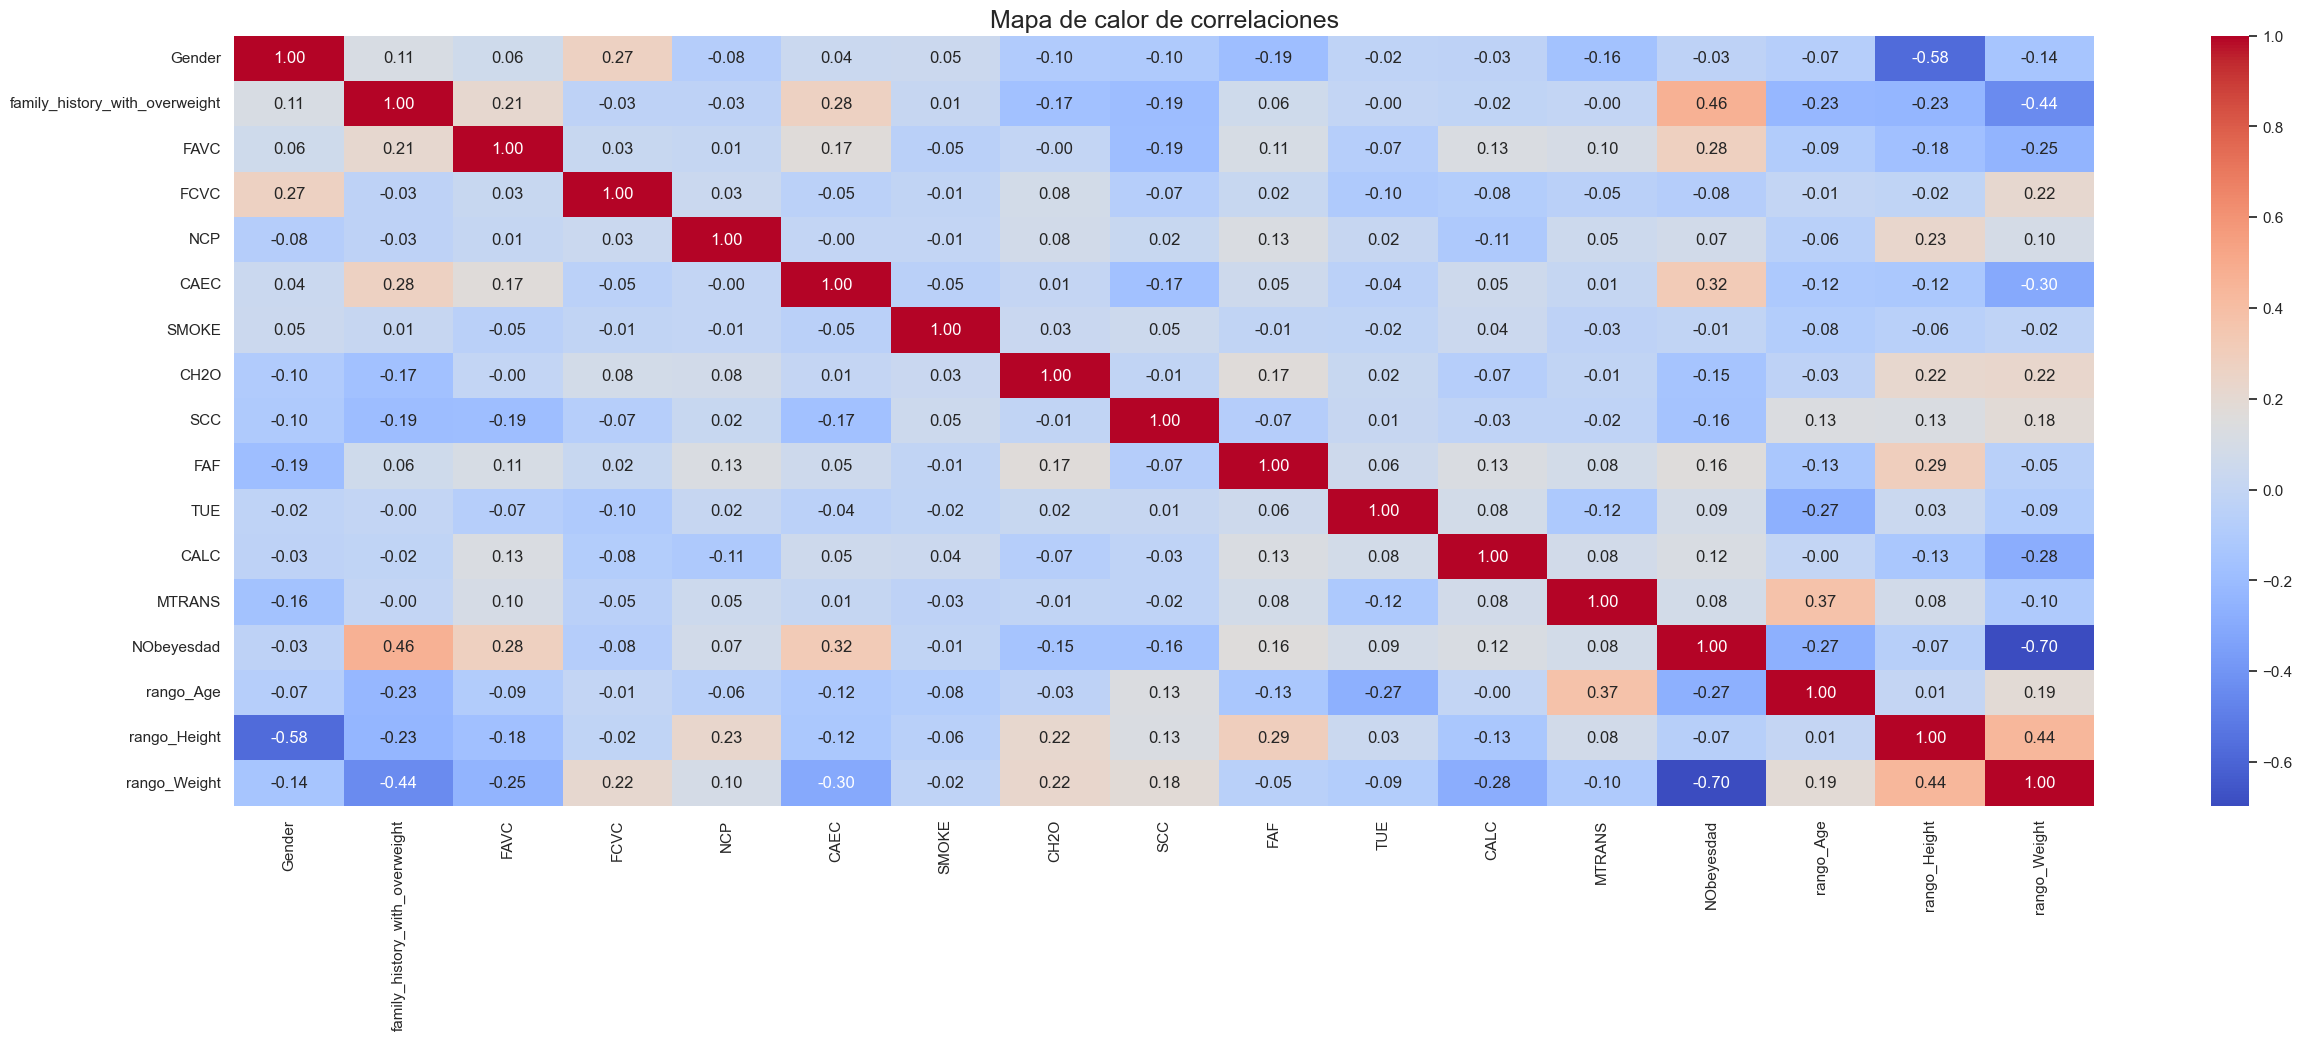

In [89]:
plt.figure(figsize=(30,10))
heatmap = sns.heatmap(df.corr(), annot = True, cmap="coolwarm",fmt=".2f")
#el ftm permirte mostrar solo dos decimales
plt.title("Mapa de calor de correlaciones", fontsize=18)
plt.show()
# colores intensos puede estar explicado por otra variable esto se llama colinealidad y no es conveniente llevado
# si una variable sobrepasa el 70% es conveniente llevarlo ? esto lo debes de responder vos
